Best alpha: 1000.000000
Mean Squared Error (test): 995617811.94


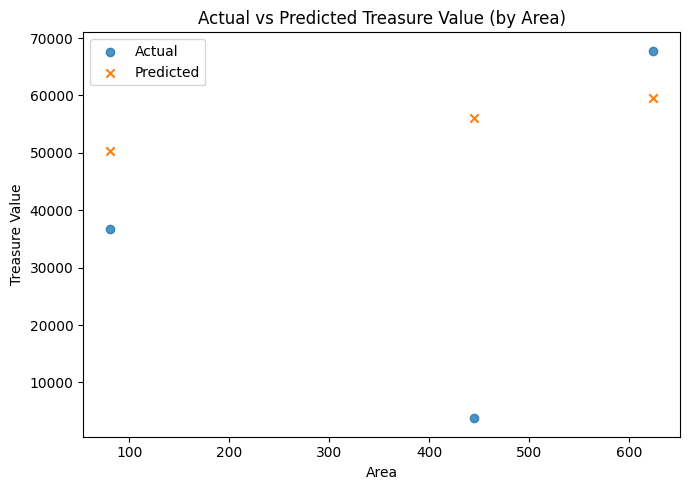


Predictions on test locations:
- Cave of Wonders      | Actual:  67803 | Predicted:  59611
- Chum Bucket          | Actual:   3747 | Predicted:  56051
- Rocky Road           | Actual:  36773 | Predicted:  50338


In [8]:
# -----------------------------
# Coral Cove Treasure Predictor
# -----------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# 1) ----- Data creation -----
np.random.seed(42)

locations = [
    'Krusty Krab', 'Chum Bucket', 'Bubble Stand', 'Jellyfish Fields',
    'Goo Lagoon', 'Rocky Road', 'Bikini Bottom Mall', 'Glove World',
    'Cave of Wonders', 'Boating School'
]

data = pd.DataFrame({
    "Location": locations,
    "Area": np.random.randint(10, 1001, size=10),              # 10..1000
    "FishPopulation": np.random.randint(100, 10001, size=10),  # 100..10000
    "SeaweedDensity": np.random.randint(0, 101, size=10),      # 0..100
    "TreasureValue": np.random.randint(1000, 100001, size=10)  # 1,000..100,000
})

# 2) ----- Train/test split -----
X = data[["Area", "FishPopulation", "SeaweedDensity"]]
y = data["TreasureValue"]

X_train, X_test, y_train, y_test, loc_train, loc_test = train_test_split(
    X, y, data["Location"], test_size=0.3, random_state=42
)

# 3) ----- Lasso regression (with scaling + hyperparameter search) -----
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(max_iter=10000, random_state=42))
])

param_grid = {
    "lasso__alpha": np.logspace(-3, 3, 50)  # test a wide range of alphas
}

search = GridSearchCV(pipe, param_grid=param_grid, cv=3, scoring="neg_mean_squared_error")
search.fit(X_train, y_train)

best_model = search.best_estimator_
print(f"Best alpha: {search.best_params_['lasso__alpha']:.6f}")

# 4) ----- Evaluation -----
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (test): {mse:.2f}")

# 5) ----- Visualization (Actual vs Predicted) -----
plt.figure(figsize=(7, 5))
plt.scatter(X_test["Area"], y_test, label="Actual", alpha=0.8)
plt.scatter(X_test["Area"], y_pred, label="Predicted", marker="x")
plt.title("Actual vs Predicted Treasure Value (by Area)")
plt.xlabel("Area")
plt.ylabel("Treasure Value")
plt.legend()
plt.tight_layout()
plt.show()

# 6) ----- Per-location predictions (test set) -----
print("\nPredictions on test locations:")
for loc, actual, pred in zip(loc_test, y_test, y_pred):
    print(f"- {loc:20s} | Actual: {int(actual):6d} | Predicted: {int(round(pred)):6d}")


In [7]:
import pickle

with open('model.pkl', "wb") as f:
    pickle.dump(model, f)
